In [13]:
import math
from PIL import Image

def get_colors(image_path, num_colors):
    # Open the image and resize it to speed up processing
    image = Image.open(image_path)
    image = image.resize((200, 200))

    # Get the colors from the image
    colors = image.getcolors(200 * 200)
    colors = sorted(colors, key=lambda t: t[0], reverse=True)

    # Get the dominant colors
    dominant_colors = [colors[0][1]]
    for count, color in colors[1:]:
        if len(dominant_colors) >= num_colors:
            break
        distinct = True
        for dc in dominant_colors:
            distance = math.sqrt(sum([(c1 - c2) ** 2 for c1, c2 in zip(color, dc)]))
            if distance < 50:  # set a threshold for how similar colors can be
                distinct = False
                break
        if distinct:
            dominant_colors.append(color)

    # Remove any similar colors from the dominant color list
    i = 0
    while i < len(dominant_colors):
        color1 = dominant_colors[i]
        j = i + 1
        while j < len(dominant_colors):
            color2 = dominant_colors[j]
            distance = math.sqrt(sum([(c1 - c2) ** 2 for c1, c2 in zip(color1, color2)]))
            if distance < 100:  # set a threshold for how similar colors can be
                dominant_colors.pop(j)
            else:
                j += 1
        i += 1

    # Convert the RGB tuples to hexadecimal values
    dominant_colors_hex = []
    for color in dominant_colors:
        hex_value = '#{:02x}{:02x}{:02x}'.format(*color)
        dominant_colors_hex.append(hex_value)

    # Print the most dominant colors
    # print(f'Top {num_colors} most dominant colors are:')
    # for i, color in enumerate(dominant_colors_hex):
    #     print(f'{i+1}. {color}')

    return dominant_colors_hex

# Example usage    
# dominant_colors_hex = get_colors('/content/im (51).jpg', 20)
# print(dominant_colors_hex)
# data = []
# #dominant_colors_hex = get_colors('/content/img3.jpg', 1000)
# #a = dominant_colors_hex[::10]
# for i in range(1, 101):
#   path = f'/content/im ({50+i}).jpg'
#   dom_color = get_colors(path, 20)
#   a = dom_color[:5]
#   while(len(a)<5):
#     a.append('')
#   data.append(a)

In [14]:
import os

folder_path = "C:\\Users\\jashd\\OneDrive\\Documents\\Github\\Personal Projects\\sadan\\backend\\dataset\\Livingroom"
image_extensions = [".jpg", ".jpeg", ".png", ".gif"]

image_paths = []
data = []
for filename in os.listdir(folder_path):
    if any(filename.lower().endswith(ext) for ext in image_extensions):
        image_paths.append(os.path.join(folder_path, filename))

for i in image_paths:
    path = i
    dom_color = get_colors(path, 20)
    a = dom_color[:5]
    while(len(a)<5):
        a.append('')
        data.append(a)

In [15]:
print(data)

[['#ffffff', '#7b6a56', '#151419', '#aeaeb0', ''], ['#dcdcdc', '#23272a', '#72777a', '#d0d772', ''], ['#ffffff', '#c5c1be', '#7c716d', '#3d2f26', ''], ['#ffffff', '#bebebe', '#563526', '#89806f', ''], ['#ffffff', '#bda98e', '#2a251f', '#9d6240', ''], ['#afafaf', '#040404', '#fcfcfc', '#71645b', ''], ['#cbcbbf', '#080202', '#a48e55', '#782d17', ''], ['#d4c7bf', '#988c74', '#4e4139', '', ''], ['#d4c7bf', '#988c74', '#4e4139', '', ''], ['#ccbfaf', '#130e0a', '#776757', '', ''], ['#ccbfaf', '#130e0a', '#776757', '', ''], ['#eeeeee', '#0e0903', '#a8adb1', '#70726d', ''], ['#ffffff', '#b7a69f', '#352c2f', '#7b675e', ''], ['#dbc593', '#484c3d', '#b0603b', '#ffffef', ''], ['#eeedeb', '#887d7b', '#241f1b', '', ''], ['#eeedeb', '#887d7b', '#241f1b', '', ''], ['#c3beb8', '#fffdf3', '#533b23', '#789b61', ''], ['#ffffff', '#a7a3a0', '#716057', '#301400', ''], ['#d5d8df', '#5b5e65', '#1b1b1b', '#9d9ca1', ''], ['#d4d0c5', '#353420', '#8c8278', '', ''], ['#d4d0c5', '#353420', '#8c8278', '', ''], ['#cc

In [30]:
import pandas as pd


# Create a list to store dictionaries of color palettes
color_palette_data = []

# Loop through each color palette and create a dictionary
for palette in data:
    color_dict = {
        'color1': palette[0],
        'color2': palette[1],
        'color3': palette[2],
        'color4': palette[3]
    }
    color_palette_data.append(color_dict)

# Convert the list of dictionaries into a Pandas DataFrame
df = pd.DataFrame(color_palette_data)

# Print the resulting DataFrame
print(df)


      color1   color2   color3
0    #ffffff  #7b6a56  #151419
1    #dcdcdc  #23272a  #72777a
2    #ffffff  #c5c1be  #7c716d
3    #ffffff  #bebebe  #563526
4    #ffffff  #bda98e  #2a251f
..       ...      ...      ...
836  #ffffff  #b4ae8e  #7a522f
837  #ffffff  #b0a99f  #3e1e13
838  #ffffff  #141414  #b2b2b2
839  #ffffff  #1f1f21  #adadab
840  #ededef  #261e1b  #b2acac

[841 rows x 3 columns]


In [31]:
df.to_csv("C:\\Users\\jashd\\OneDrive\\Documents\\Github\\Personal Projects\\sadan\\backend\\trash\\colors.csv")

In [32]:
df = pd.read_csv('C:\\Users\\jashd\\OneDrive\\Documents\\Github\\Personal Projects\\sadan\\backend\\trash\\colors.csv')

In [33]:
df.head(5)

,Unnamed: 0,color1,color2,color3
0,0,#ffffff,#7b6a56,#151419
1,1,#dcdcdc,#23272a,#72777a
2,2,#ffffff,#c5c1be,#7c716d
3,3,#ffffff,#bebebe,#563526
4,4,#ffffff,#bda98e,#2a251f


In [34]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [35]:
df.head(5)

,color1,color2,color3
0,#ffffff,#7b6a56,#151419
1,#dcdcdc,#23272a,#72777a
2,#ffffff,#c5c1be,#7c716d
3,#ffffff,#bebebe,#563526
4,#ffffff,#bda98e,#2a251f


In [36]:
df.isnull().sum()/len(df)*100

color1    0.0
color2    0.0
color3    0.0
dtype: float64

In [24]:
df.drop('color5', axis=1, inplace = True)

In [37]:
df.head(5)

,color1,color2,color3
0,#ffffff,#7b6a56,#151419
1,#dcdcdc,#23272a,#72777a
2,#ffffff,#c5c1be,#7c716d
3,#ffffff,#bebebe,#563526
4,#ffffff,#bda98e,#2a251f


In [38]:
for column in df.columns:
    most_common = df[column].mode()[0]
    df[column].fillna(most_common, inplace=True)

In [39]:
df.isnull().sum()

color1    0
color2    0
color3    0
dtype: int64

In [40]:
df.head(5)

,color1,color2,color3
0,#ffffff,#7b6a56,#151419
1,#dcdcdc,#23272a,#72777a
2,#ffffff,#c5c1be,#7c716d
3,#ffffff,#bebebe,#563526
4,#ffffff,#bda98e,#2a251f


In [41]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

for column in df.columns:
    df[column] = df[column].apply(hex_to_rgb)

In [42]:
df

,color1,color2,color3
0,"(255, 255, 255)","(123, 106, 86)","(21, 20, 25)"
1,"(220, 220, 220)","(35, 39, 42)","(114, 119, 122)"
2,"(255, 255, 255)","(197, 193, 190)","(124, 113, 109)"
3,"(255, 255, 255)","(190, 190, 190)","(86, 53, 38)"
4,"(255, 255, 255)","(189, 169, 142)","(42, 37, 31)"
...,...,...,...
836,"(255, 255, 255)","(180, 174, 142)","(122, 82, 47)"
837,"(255, 255, 255)","(176, 169, 159)","(62, 30, 19)"
838,"(255, 255, 255)","(20, 20, 20)","(178, 178, 178)"
839,"(255, 255, 255)","(31, 31, 33)","(173, 173, 171)"


In [43]:
df['color1_red'] = df['color1'].apply(lambda x: x[0])
df['color1_green'] = df['color1'].apply(lambda x: x[1])
df['color1_blue'] = df['color1'].apply(lambda x: x[2])

df['color2_red'] = df['color2'].apply(lambda x: x[0])
df['color2_green'] = df['color2'].apply(lambda x: x[1])
df['color2_blue'] = df['color2'].apply(lambda x: x[2])

df['color3_red'] = df['color3'].apply(lambda x: x[0])
df['color3_green'] = df['color3'].apply(lambda x: x[1])
df['color3_blue'] = df['color3'].apply(lambda x: x[2])


# Drop the original RGB columns
df = df.drop(['color1', 'color2', 'color3'], axis=1)

In [44]:
X = df[['color2_red', 'color2_green', 'color2_blue',
        'color3_red', 'color3_green', 'color3_blue']]
y = df[['color1_red', 'color1_green', 'color1_blue']]

In [45]:
X

,color2_red,color2_green,color2_blue,color3_red,color3_green,color3_blue
0,123,106,86,21,20,25
1,35,39,42,114,119,122
2,197,193,190,124,113,109
3,190,190,190,86,53,38
4,189,169,142,42,37,31
...,...,...,...,...,...,...
836,180,174,142,122,82,47
837,176,169,159,62,30,19
838,20,20,20,178,178,178
839,31,31,33,173,173,171


In [46]:
y

,color1_red,color1_green,color1_blue
0,255,255,255
1,220,220,220
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
836,255,255,255
837,255,255,255
838,255,255,255
839,255,255,255


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import pickle

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
pickle.dump(model, open("my_model.pkl", "wb"))


# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
#flask 
import pandas as pd
import datetime
import cv2
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))


def readImage(img_name):
    img = cv2.imread(img_name)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def resizeAndPad(img, size, pad_color=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) is 3 and not isinstance(pad_color, (list, tuple, np.ndarray)): # color image but only one color provided
        pad_color = [pad_color]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=pad_color)

    return scaled_img

def getColoredImage(img, new_color, pattern_image):

    hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv_image)
    new_hsv_image = hsv_image

    if new_color is not None:
        color = np.uint8([[new_color]])
        hsv_color = cv2.cvtColor(color, cv2.COLOR_RGB2HSV)
        h.fill(hsv_color[0][0][0])  # todo: optimise to handle black/white walls
        s.fill(hsv_color[0][0][1])
        new_hsv_image = cv2.merge([h, s, v])

    else:
        pattern = cv2.imread('./public/patterns/' + pattern_image)
        hsv_pattern = cv2.cvtColor(pattern, cv2.COLOR_BGR2HSV)
        hp, sp, vp = cv2.split(hsv_pattern)
        # cv2.add(vp, v, vp)
        new_hsv_image = cv2.merge([hp, sp, v])

    new_rgb_image = cv2.cvtColor(new_hsv_image, cv2.COLOR_HSV2RGB)
    return new_rgb_image


def mergeImages(img, colored_image, wall):
    colored_image = cv2.bitwise_and(colored_image, colored_image, mask=wall)
    marked_img = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(wall))
    final_img = cv2.bitwise_xor(colored_image, marked_img)
    return final_img


def saveImage(img_name, img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    path_out = f"./static/outputs/{img_name}"
    cv2.imwrite(path_out, img)
    return path_out


def getOutlineImg(img):
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    # img = clahe.apply(img)
    # img = cv2.equalizeHist(img)
    return cv2.Canny(img,50,200)  # todo: can be optimised later

def selectWall(outline_img, position):
    h, w = outline_img.shape[:2]
    wall = outline_img.copy()
    scaled_mask = resizeAndPad(outline_img, (h+2,w+2), 255)
    cv2.floodFill(wall, scaled_mask, position, 255)   # todo: can be optimised later
    cv2.subtract(wall, outline_img, wall) 
    return wall


def changeColor(image_path, position, new_color, pattern_image):
    start = datetime.timestamp(datetime.now())
    img = readImage(image_path)
    image_name = os.path.basename(image_path)

    colored_image = getColoredImage(img, new_color, pattern_image)

    outline_img = getOutlineImg(img)

    selected_wall = selectWall(outline_img, position)
    
    final_img = mergeImages(img, colored_image, selected_wall)
    
    end = start = datetime.timestamp(datetime.now())
    print (end-start)
    return saveImage(image_name, final_img)
    # showImages(original_img, colored_image, selected_wall, final_img)



data = []
def recommend_image(image_path):
    dom_color = get_colors(path, 20)
    a = dom_color[:5]
    while(len(a)<5):
        a.append('')
        data.append(a)
    
    color_palette_data = []
    for palette in data:
        color_dict = {
            'color1': palette[0],
            'color2': palette[1],
            'color3': palette[2],
            'color4': palette[3]
        }
    color_palette_data.append(color_dict)

    # Convert the list of dictionaries into a Pandas DataFrame
    df = pd.DataFrame(color_palette_data)

    for column in df.columns:
        df[column] = df[column].apply(hex_to_rgb)

    df['color1_red'] = df['color1'].apply(lambda x: x[0])
    df['color1_green'] = df['color1'].apply(lambda x: x[1])
    df['color1_blue'] = df['color1'].apply(lambda x: x[2])

    df['color2_red'] = df['color2'].apply(lambda x: x[0])
    df['color2_green'] = df['color2'].apply(lambda x: x[1])
    df['color2_blue'] = df['color2'].apply(lambda x: x[2])

    df['color3_red'] = df['color3'].apply(lambda x: x[0])
    df['color3_green'] = df['color3'].apply(lambda x: x[1])
    df['color3_blue'] = df['color3'].apply(lambda x: x[2])

    df['color4_red'] = df['color4'].apply(lambda x: x[0])
    df['color4_green'] = df['color4'].apply(lambda x: x[1])
    df['color4_blue'] = df['color4'].apply(lambda x: x[2])

    # Drop the original RGB columns
    df = df.drop(['color1', 'color2', 'color3'], axis=1)

    X = df[['color2_red', 'color2_green', 'color2_blue',
        'color3_red', 'color3_green', 'color3_blue']]
    
    pickle.load(open("my_model.pkl", "rb"))
    y_pred = model.predict(X)
    return changeColor(image_path, (300, 100), [y_pred[0][0], y_pred[0][1], y_pred[0][2]], None)
    

In [ ]:
print(y_pred)

[[227.22707261 220.38458404 216.97921802]
 [243.60666634 243.19666376 240.56510391]
 [116.51701857 111.98996114 107.80445662]
 ...
 [160.91101964 159.40960581 157.49817885]
 [203.59002848 201.22756993 197.66270147]
 [160.76475277 151.55181144 138.52916047]]


In [ ]:
a = y_pred[0][0]
print(a)

227.22707261178223


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test and y_pred are your true and predicted RGB values for color1
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 3450.8989487822496
Mean Absolute Error: 47.0522007347675
R-squared: 0.42612360637679


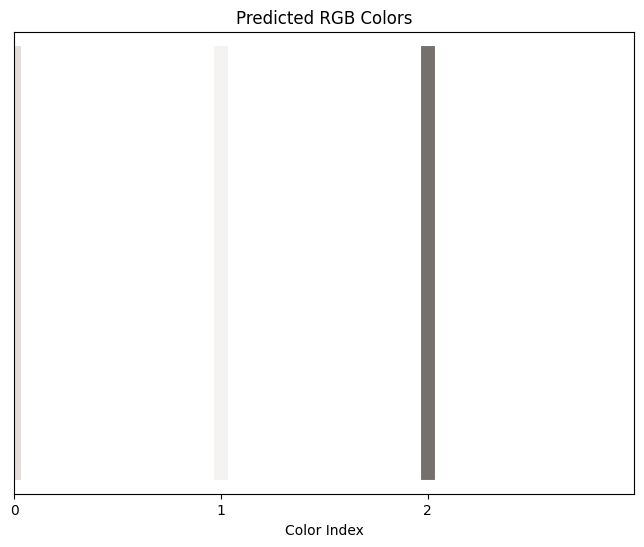

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample RGB color data (replace this with your y_pred values)
# y_pred = np.array([
#     [227.22707261, 220.38458404, 216.97921802],
#     [243.60666634, 243.19666376, 240.56510391],
#     [116.51701857, 111.98996114, 107.80445662],
#     # ... (other RGB values)
# ])

# Create a new figure
plt.figure(figsize=(8, 6))

# Loop through the first 3 RGB values and plot them
for idx, rgb in enumerate(y_pred[:3]):
    plt.plot([idx, idx], [0, 1], color=(rgb[0] / 255, rgb[1] / 255, rgb[2] / 255), linewidth=10)

# Set the x-axis limits and labels
plt.xlim(0, 3)
plt.xticks(range(3))
plt.xlabel("Color Index")

# Remove y-axis
plt.yticks([])

# Set the title and show the plot
plt.title("Predicted RGB Colors")
plt.show()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

def readImage(img_name):
    path = f'D:/Code/interior/input/{img_name}'
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def resizeAndPad(img, size, pad_color=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) is 3 and not isinstance(pad_color, (list, tuple, np.ndarray)): # color image but only one color provided
        pad_color = [pad_color]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=pad_color)

    return scaled_img


def getOutlineImg(img):
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    # img = clahe.apply(img)
    # img = cv2.equalizeHist(img)
    return cv2.Canny(img,50,200)  # todo: can be optimised later


def getColoredImage(img, new_color, pattern_image):

    hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv_image)
    new_hsv_image = hsv_image

    if new_color is not None:
        color = np.uint8([[new_color]])
        hsv_color = cv2.cvtColor(color, cv2.COLOR_RGB2HSV)
        h.fill(hsv_color[0][0][0])  # todo: optimise to handle black/white walls
        s.fill(hsv_color[0][0][1])
        new_hsv_image = cv2.merge([h, s, v])

    else:
        pattern = cv2.imread('./public/patterns/' + pattern_image)
        hsv_pattern = cv2.cvtColor(pattern, cv2.COLOR_BGR2HSV)
        hp, sp, vp = cv2.split(hsv_pattern)
        # cv2.add(vp, v, vp)
        new_hsv_image = cv2.merge([hp, sp, v])

    new_rgb_image = cv2.cvtColor(new_hsv_image, cv2.COLOR_HSV2RGB)
    return new_rgb_image


def selectWall(outline_img, position):
    h, w = outline_img.shape[:2]
    wall = outline_img.copy()
    scaled_mask = resizeAndPad(outline_img, (h+2,w+2), 255)
    cv2.floodFill(wall, scaled_mask, position, 255)   # todo: can be optimised later
    cv2.subtract(wall, outline_img, wall) 
    return wall


def mergeImages(img, colored_image, wall):
    colored_image = cv2.bitwise_and(colored_image, colored_image, mask=wall)
    marked_img = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(wall))
    final_img = cv2.bitwise_xor(colored_image, marked_img)
    return final_img


def saveImage(img_name, img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    path_out = f"./static/outputs/{img_name}"
    cv2.imwrite(path_out, img)


def showImages(original_img, colored_image, selected_wall, final_img):
    plt.subplot(221),plt.imshow(original_img, cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(222),plt.imshow(colored_image, cmap = 'gray')
    plt.title('Colored Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(223),plt.imshow(selected_wall, cmap = 'gray')
    plt.title('Selected Wall'), plt.xticks([]), plt.yticks([])
    plt.subplot(224),plt.imshow(final_img, cmap = 'gray')
    plt.title('Final Image'), plt.xticks([]), plt.yticks([])
    plt.show()


def changeColor(image_name, position, new_color, pattern_image):
    start = datetime.timestamp(datetime.now())
    img = readImage(image_name)
    original_img = img.copy()

    colored_image = getColoredImage(img, new_color, pattern_image)

    outline_img = getOutlineImg(img)
    original_outline_img = outline_img.copy()

    selected_wall = selectWall(outline_img, position)
    
    final_img = mergeImages(img, colored_image, selected_wall)
    
    end = start = datetime.timestamp(datetime.now())
    print (end-start)
    saveImage(image_name, final_img)
    # showImages(original_img, colored_image, selected_wall, final_img)
    


# changeColor('img3.jpg', (300, 100), [105, 149, 173], None)
changeColor("test.jpg", (300, 100), [y_pred[0][0], y_pred[0][1], y_pred[0][2]], None)

# PINK: 220, 180, 170
# Purple: 125, 119, 131
# green: 135, 168, 161
# blue: 150, 182, 207

0.0


<>:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\athar\AppData\Local\Temp\ipykernel_14968\2962843277.py:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(img.shape) is 3 and not isinstance(pad_color, (list, tuple, np.ndarray)): # color image but only one color provided
